In [1]:
import sys
sys.path.append('../')
from brainage_evalfunctions import *
import matplotlib.pyplot as plt
import seaborn as sns
import active_dynamicmemory.utils as admutils

['1.5T Philips', '1.5T', '3.0T Philips', '3.0T']


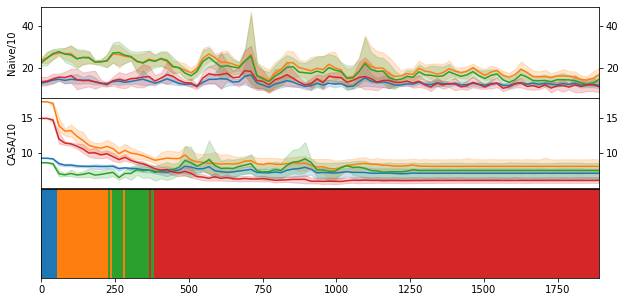

In [2]:
plot_validation_curves(['../training_configs/brainage_naive_10.yml',
                                '../training_configs/brainage_casa_10.yml'], 
                               names=['Naive/10', 'CASA/10'], seeds=[1, 2, 3, 4, 5])

['1.5T Philips', '1.5T', '3.0T Philips', '3.0T']


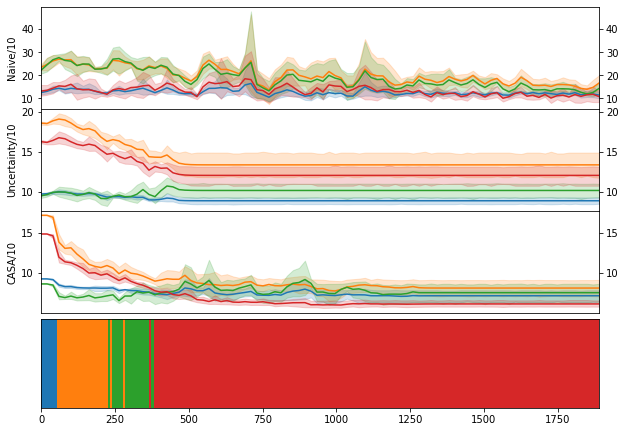

In [2]:
plot_validation_curves(['../training_configs/brainage_naive_10.yml',
                        '../training_configs/brainage_uncertainty_10.yml',
                                '../training_configs/brainage_casa_10.yml'], 
                               names=['Naive/10', 'Uncertainty/10','CASA/10'], seeds=[1, 2, 3, 4, 5])

['1.5T Philips', '1.5T', '3.0T Philips', '3.0T']
1.5T
3.0T Philips
3.0T


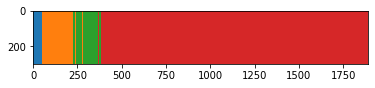

In [16]:
with open('../training_configs/brainage_casa_10.yml') as f:
    params = yaml.load(f, Loader=yaml.FullLoader)

ds = BrainAgeContinuous(params['trainparams']['datasetfile'], seed=1, order=['1.5T Philips', '1.5T', '3.0T Philips', '3.0T'])
res = ds.df.scanner == params['trainparams']['order'][0]
for j, s in enumerate(params['trainparams']['order'][1:]):
    print(s)
    res[ds.df.scanner == s] = j+2

plt.imshow(np.tile(res,(300,1)), cmap=ListedColormap(sns.color_palette()[:4]))

In [10]:
ds.df.groupby('scanner').count()

,ID,Age,Image,split
scanner,,,,
1.5T Philips,52,52,52,52
3.0T,1504,1504,1504,1504
3.0T Philips,145,145,145,145


In [12]:
df = pd.read_csv('/project/catinous/brainds_split_val_test_melba.csv')
df

,ID,scanner,Age,Image,split
0,IXI002,1.5T Philips,35.800137,/data/dataset/external/IXI/IXI002-Guys-0828-T1...,base
1,IXI012,3.0T Philips,38.781656,/data/dataset/external/IXI/IXI012-HH-1211-T1.n...,train
2,IXI013,3.0T Philips,46.710472,/data/dataset/external/IXI/IXI013-HH-1212-T1.n...,train
3,IXI014,3.0T Philips,34.236824,/data/dataset/external/IXI/IXI014-HH-1236-T1.n...,train
4,IXI015,3.0T Philips,24.284736,/data/dataset/external/IXI/IXI015-HH-1258-T1.n...,train
...,...,...,...,...,...
2606,OAS31169_MR_d0620,3.0T,64.660000,/data/dataset/external/OASIS/files/sub-OAS3116...,train
2607,OAS31170_MR_d2410,3.0T,71.370000,/data/dataset/external/OASIS/files/sub-OAS3117...,val
2608,OAS31171_MR_d0752,3.0T,68.050000,/data/dataset/external/OASIS/files/sub-OAS3117...,train
2609,OAS31172_MR_d0407,3.0T,72.020000,/data/dataset/external/OASIS/files/sub-OAS3117...,train


In [14]:
df.groupby(['split']).count()

ID   Age  Image
scanner      split                   
1.5T         test     23    23     23
             train   190   190    190
             val      23    23     23
1.5T Philips base    201   201    201
             test     31    31     31
             train    52    52     52
             val      31    31     31
3.0T         test    187   187    187
             train  1504  1504   1504
             val     187   187    187
3.0T Philips test     18    18     18
             train   146   146    146
             val      18    18     18

['Siemens', 'GE', 'Philips', 'Canon']
GE
Philips
Canon


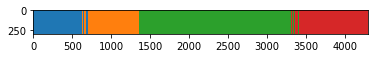

In [7]:
from datasets.ContinuousDataset import CardiacContinuous
with open('../training_configs/cardiac_casa_10.yml') as f:
    params = yaml.load(f, Loader=yaml.FullLoader)

ds = CardiacContinuous(params['trainparams']['datasetfile'], seed=1)
res = ds.df.scanner == params['trainparams']['order'][0]
for j, s in enumerate(params['trainparams']['order'][1:]):
    res[ds.df.scanner == s] = j+2

plt.imshow(np.tile(res,(300,1)), cmap=ListedColormap(sns.color_palette()[:4]))

In [6]:
res.unique()

array([1., 3., 4.])

In [21]:
eval_config('../training_configs/brainage_base.yml', split='test').round(2)

brainage_batch_brainds_split_val_test_melba_base_1_9fd356bd91
/project/catinous/active_catinous/MELBA/output/trained_models/brainage_batch_brainds_split_val_test_melba_base_1_9fd356bd91.pt
Read: /project/catinous/active_catinous/MELBA/output/trained_models/brainage_batch_brainds_split_val_test_melba_base_1_9fd356bd91.pt
False False


,scanner,AE
0,1.5T,18.26
1,1.5T Philips,6.44
2,3.0T,15.86
3,3.0T Philips,11.43


In [13]:
eval_config('../training_configs/brainage_joint.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').mean().round(2)

,AE,seed
scanner,,
1.5T,6.63,3
1.5T Philips,6.51,3
3.0T,4.38,3
3.0T Philips,5.99,3


In [14]:
eval_config('../training_configs/brainage_15phil.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').std().round(2)

,AE,seed
scanner,,
1.5T,2.64,1.58
1.5T Philips,0.37,1.58
3.0T,2.61,1.58
3.0T Philips,1.08,1.58


In [15]:
eval_config('../training_configs/brainage_15.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').std().round(2)

,AE,seed
scanner,,
1.5T,0.57,1.58
1.5T Philips,0.25,1.58
3.0T,0.28,1.58
3.0T Philips,0.93,1.58


In [16]:
eval_config('../training_configs/brainage_30phil.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').std().round(2)

,AE,seed
scanner,,
1.5T,4.81,1.58
1.5T Philips,2.05,1.58
3.0T,0.89,1.58
3.0T Philips,0.53,1.58


In [17]:
eval_config('../training_configs/brainage_30.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').std().round(2)

,AE,seed
scanner,,
1.5T,1.58,1.58
1.5T Philips,0.99,1.58
3.0T,1.13,1.58
3.0T Philips,1.67,1.58


In [ ]:
eval_config('../training_configs/brainage_joint.yml', seeds=[1, 2, 3, 4, 5]).groupby('scanner').std().round(2)

In [24]:
df_casa = eval_config('../training_configs/brainage_casa_5.yml', seeds=[1, 2, 3, 4, 5]) #outlier distance 0.6
df_casa.groupby('scanner').mean().round(2)

,ae,seed
scanner,,
1.5T,9.07,3
1.5T Philips,6.61,3
3.0T,6.27,3
3.0T Philips,8.83,3
BWT,-0.19,3
FWT,-4.73,3


In [26]:
df_casa = eval_config('../training_configs/brainage_casa_8.yml', seeds=[1, 2, 3, 4, 5]) #outlier distance 0.6
df_casa.groupby('scanner').mean().round(2)

,ae,seed
scanner,,
1.5T,9.41,3
1.5T Philips,7.25,3
3.0T,6.56,3
3.0T Philips,9.45,3
BWT,-0.08,3
FWT,-4.43,3


In [2]:
df_casa = eval_config('../training_configs/brainage_casa_10.yml', seeds=[1, 2, 3, 4, 5]) #outlier distance 0.6
df_casa.groupby('scanner').mean().round(2)

/project/catinous/active_catinous/MELBA/output/results//cache/brainage_cont_brainds_split_val_test_melba_basemodel_batch_memory_tf08_1_261b957d13_['test']_AEs.csv
/project/catinous/active_catinous/MELBA/output/results//cache/brainage_cont_brainds_split_val_test_melba_basemodel_batch_memory_tf08_2_c3244a38f0_['test']_AEs.csv
/project/catinous/active_catinous/MELBA/output/results//cache/brainage_cont_brainds_split_val_test_melba_basemodel_batch_memory_tf08_3_65ed98c89e_['test']_AEs.csv
/project/catinous/active_catinous/MELBA/output/results//cache/brainage_cont_brainds_split_val_test_melba_basemodel_batch_memory_tf08_4_edf6484979_['test']_AEs.csv
/project/catinous/active_catinous/MELBA/output/results//cache/brainage_cont_brainds_split_val_test_melba_basemodel_batch_memory_tf08_5_ff303212a6_['test']_AEs.csv


,ae,seed
scanner,,
1.5T,8.96,3
1.5T Philips,6.40,3
3.0T,6.54,3
3.0T Philips,8.56,3
BWT,-0.23,3
FWT,-4.85,3


In [35]:
with open('../training_configs/brainage_casa_10.yml') as f:
    params = yaml.load(f, Loader=yaml.FullLoader)
    
split=['test']

bwts = []
fwts = []

for i in range(5):

    settings = argparse.Namespace(**params['settings'])
    expname = admutils.get_expname(params['trainparams'])
    
    params['trainparams']['seed'] = i+1
    params['trainparams']['run_postfix'] = i+1
    
    order = params['trainparams']['order'].copy()

    if not os.path.exists(f'{settings.RESULT_DIR}/cache/{expname}_{split}_AEs.csv'):
        if params['trainparams']['continuous'] == False:
            eval_brainage_batch(params, f'{settings.RESULT_DIR}/cache/{expname}_{split}_AEs.csv', split=split)
        else:
            eval_brainage(params, f'{settings.RESULT_DIR}/cache/{expname}_{split}_AEs.csv', split=split)

    if params['trainparams']['continuous'] == False:
        df = pd.read_csv(f'{settings.RESULT_DIR}/cache/{expname}_{split}_AEs.csv')
        df_temp = df.groupby(['scanner']).mean().reset_index()
        print('.')
    df = pd.read_csv(f'{settings.RESULT_DIR}/cache/{expname}_{split}_AEs.csv')
    df_temp = df.groupby(['scanner', 'shift']).mean().reset_index()

    df_res = df_temp.loc[df_temp['shift'] == 'None']

    df_bwt_fwt = df_temp.groupby(['scanner', 'shift']).mean().reset_index()
    bwt = 0.0
    fwt = 0.0

    for i in range(len(order) - 1):
        df_scanner = df_bwt_fwt.loc[df_bwt_fwt.scanner == order[i]]
        bwt += df_scanner.loc[df_scanner['shift'] == order[i + 1]].ae.values[0] - \
               df_scanner.loc[df_scanner['shift'] == 'None'].ae.values[0]

    order.append('None')

    for i in range(2, len(order)):
        df_scanner = df_bwt_fwt.loc[df_bwt_fwt.scanner == order[i - 1]]
        fwt += df_scanner.loc[df_scanner['shift'] == order[1]].ae.values[0] - df_scanner.loc[df_scanner['shift'] == order[i]].ae.values[0]


    bwt /= len(order) - 1
    fwt /= len(order) - 1
    
    bwts.append(bwt)
    fwts.append(fwt)
print('bwt', np.array(bwts).mean(),np.array(bwts).std())
print('fwt', np.array(fwts).mean(),np.array(fwts).std())

bwt 0.45603284477648814 0.5928333871334421
fwt 4.970154785566062 0.22608282028843085


In [29]:
with open('../training_configs/brainage_uncertainty_10.yml') as f:
    params = yaml.load(f, Loader=yaml.FullLoader)
    
split=['test']

bwts = []
fwts = []

for i in range(5):

    settings = argparse.Namespace(**params['settings'])
    expname = admutils.get_expname(params['trainparams'])
    
    params['trainparams']['seed'] = i+1
    params['trainparams']['run_postfix'] = i+1
    
    order = params['trainparams']['order'].copy()

    if not os.path.exists(f'{settings.RESULT_DIR}/cache/{expname}_{split}_AEs.csv'):
        if params['trainparams']['continuous'] == False:
            eval_brainage_batch(params, f'{settings.RESULT_DIR}/cache/{expname}_{split}_AEs.csv', split=split)
        else:
            eval_brainage(params, f'{settings.RESULT_DIR}/cache/{expname}_{split}_AEs.csv', split=split)

    if params['trainparams']['continuous'] == False:
        df = pd.read_csv(f'{settings.RESULT_DIR}/cache/{expname}_{split}_AEs.csv')
        df_temp = df.groupby(['scanner']).mean().reset_index()
        print('.')
    df = pd.read_csv(f'{settings.RESULT_DIR}/cache/{expname}_{split}_AEs.csv')
    df_temp = df.groupby(['scanner', 'shift']).mean().reset_index()

    df_res = df_temp.loc[df_temp['shift'] == 'None']

    df_bwt_fwt = df_temp.groupby(['scanner', 'shift']).mean().reset_index()
    bwt = 0.0
    fwt = 0.0

    for i in range(len(order) - 1):
        df_scanner = df_bwt_fwt.loc[df_bwt_fwt.scanner == order[i]]
        bwt += df_scanner.loc[df_scanner['shift'] == order[i + 1]].ae.values[0] - \
               df_scanner.loc[df_scanner['shift'] == 'None'].ae.values[0]

    order.append('None')

    for i in range(2, len(order)):
        df_scanner = df_bwt_fwt.loc[df_bwt_fwt.scanner == order[i - 1]]
        fwt += df_scanner.loc[df_scanner['shift'] == order[1]].ae.values[0] - df_scanner.loc[df_scanner['shift'] == order[i]].ae.values[0]


    bwt /= len(order) - 1
    fwt /= len(order) - 1
    
    bwts.append(bwt)
    fwts.append(fwt)
print('bwt', np.array(bwts).mean(),np.array(bwts).std())
print('fwt', np.array(fwts).mean(),np.array(fwts).std())

bwt 1.159362531380804 0.3884401497638366
fwt 1.6617566943467363 0.5153404069611525


In [33]:
with open('../training_configs/brainage_naive_10.yml') as f:
    params = yaml.load(f, Loader=yaml.FullLoader)
    
split=['test']

bwts = []
fwts = []

for i in range(5):

    settings = argparse.Namespace(**params['settings'])
    expname = admutils.get_expname(params['trainparams'])
    
    params['trainparams']['seed'] = i+1
    params['trainparams']['run_postfix'] = i+1
    
    order = params['trainparams']['order'].copy()

    if not os.path.exists(f'{settings.RESULT_DIR}/cache/{expname}_{split}_AEs.csv'):
        if params['trainparams']['continuous'] == False:
            eval_brainage_batch(params, f'{settings.RESULT_DIR}/cache/{expname}_{split}_AEs.csv', split=split)
        else:
            eval_brainage(params, f'{settings.RESULT_DIR}/cache/{expname}_{split}_AEs.csv', split=split)

    if params['trainparams']['continuous'] == False:
        df = pd.read_csv(f'{settings.RESULT_DIR}/cache/{expname}_{split}_AEs.csv')
        df_temp = df.groupby(['scanner']).mean().reset_index()
        print('.')
    df = pd.read_csv(f'{settings.RESULT_DIR}/cache/{expname}_{split}_AEs.csv')
    df_temp = df.groupby(['scanner', 'shift']).mean().reset_index()

    df_res = df_temp.loc[df_temp['shift'] == 'None']

    df_bwt_fwt = df_temp.groupby(['scanner', 'shift']).mean().reset_index()
    bwt = 0.0
    fwt = 0.0

    for i in range(len(order) - 1):
        df_scanner = df_bwt_fwt.loc[df_bwt_fwt.scanner == order[i]]
        bwt += df_scanner.loc[df_scanner['shift'] == order[i + 1]].ae.values[0] - \
               df_scanner.loc[df_scanner['shift'] == 'None'].ae.values[0]

    order.append('None')

    for i in range(2, len(order)):
        df_scanner = df_bwt_fwt.loc[df_bwt_fwt.scanner == order[i - 1]]
        fwt += df_scanner.loc[df_scanner['shift'] == order[1]].ae.values[0] - df_scanner.loc[df_scanner['shift'] == order[i]].ae.values[0]


    bwt /= len(order) - 1
    fwt /= len(order) - 1
    
    bwts.append(bwt)
    fwts.append(fwt)
print('bwt', np.array(bwts).mean(),np.array(bwts).std())
print('fwt', np.array(fwts).mean(),np.array(fwts).std())

bwt 1.868960245638155 2.355729896697307
fwt 2.8204268931788197 3.4427664547127605


In [16]:
order = ['1.5T Philips', '1.5T', '3.0T Philips', '3.0T']

df_bwt_fwt = df_temp.groupby(['scanner', 'shift']).mean().reset_index()
bwt = 0.0
fwt = 0.0

for i in range(len(order) - 1):
    df_scanner = df_bwt_fwt.loc[df_bwt_fwt.scanner == order[i]]
    bwt += df_scanner.loc[df_scanner['shift'] == order[i + 1]].ae.values[0] - \
           df_scanner.loc[df_scanner['shift'] == 'None'].ae.values[0]

order.append('None')

for i in range(2, len(order)):
    df_scanner = df_bwt_fwt.loc[df_bwt_fwt.scanner == order[i - 1]]
    fwt += df_scanner.loc[df_scanner['shift'] == order[1]].ae.values[0] - df_scanner.loc[df_scanner['shift'] == order[i]].ae.values[0]


bwt /= len(order) - 1
fwt /= len(order) - 1

bwt, fwt

(1.1361262684617432, 4.735119627792656)

In [19]:
df_casa = eval_config('../training_configs/brainage_naive_10.yml', seeds=[1, 2, 3, 4, 5]) #outlier distance 0.6
df_casa.groupby('scanner').mean().round(2)

,ae,seed
scanner,,
1.5T,17.67,3
1.5T Philips,11.91,3
3.0T,15.54,3
3.0T Philips,14.16,3
BWT,-0.38,3
FWT,-3.56,3


In [ ]:
df_casa = eval_config('../training_configs/brainage_naive_10.yml', seeds=[1, 2, 3, 4, 5]) #outlier distance 0.6
df_casa.groupby('scanner').std().round(2)

/project/catinous/active_catinous/MELBA/output/results//cache/brainage_cont_brainds_split_val_test_melba_basemodel_batch_memory_tf08_1_b5e032502f_['test']_AEs.csv
/project/catinous/active_catinous/MELBA/output/results//cache/brainage_cont_brainds_split_val_test_melba_basemodel_batch_memory_tf08_2_b317820002_['test']_AEs.csv
/project/catinous/active_catinous/MELBA/output/results//cache/brainage_cont_brainds_split_val_test_melba_basemodel_batch_memory_tf08_3_1b201701e3_['test']_AEs.csv
/project/catinous/active_catinous/MELBA/output/results//cache/brainage_cont_brainds_split_val_test_melba_basemodel_batch_memory_tf08_4_a9be6ba347_['test']_AEs.csv
/project/catinous/active_catinous/MELBA/output/results//cache/brainage_cont_brainds_split_val_test_melba_basemodel_batch_memory_tf08_5_2e1432a3b7_['test']_AEs.csv


,ae,seed
scanner,,
1.5T,2.90,1.58
1.5T Philips,2.31,1.58
3.0T,3.52,1.58
3.0T Philips,2.20,1.58
BWT,1.50,1.58
FWT,3.16,1.58


In [3]:
df_casa = eval_config('../training_configs/brainage_naive_5.yml', seeds=[1, 2, 3, 4, 5]) #outlier distance 0.6
df_casa.groupby('scanner').std().round(2)

/project/catinous/active_catinous/MELBA/output/results//cache/brainage_cont_brainds_split_val_test_melba_basemodel_batch_memory_tf08_1_a053407f8a_['test']_AEs.csv
brainage_cont_brainds_split_val_test_melba_basemodel_batch_memory_tf08_1_a053407f8a
/project/catinous/active_catinous/MELBA/output/trained_models/brainage_cont_brainds_split_val_test_melba_basemodel_batch_memory_tf08_1_a053407f8a.pt
Read: /project/catinous/active_catinous/MELBA/output/trained_models/brainage_cont_brainds_split_val_test_melba_basemodel_batch_memory_tf08_1_a053407f8a.pt
True True
/project/catinous/active_catinous/MELBA/output/results//cache/brainage_cont_brainds_split_val_test_melba_basemodel_batch_memory_tf08_2_606fc87337_['test']_AEs.csv
brainage_cont_brainds_split_val_test_melba_basemodel_batch_memory_tf08_2_606fc87337
/project/catinous/active_catinous/MELBA/output/trained_models/brainage_cont_brainds_split_val_test_melba_basemodel_batch_memory_tf08_2_606fc87337.pt
Read: /project/catinous/active_catinous/MEL

,ae,seed
scanner,,
1.5T,2.75,1.58
1.5T Philips,0.36,1.58
3.0T,0.71,1.58
3.0T Philips,0.53,1.58
BWT,0.75,1.58
FWT,0.27,1.58


In [2]:
df_casa = eval_config('../training_configs/brainage_naive_10.yml', seeds=[6,7,8,9,10]) #outlier distance 0.6
df_casa.groupby('scanner').mean().round(2)

/project/catinous/active_catinous/MELBA/output/results//cache/brainage_cont_brainds_split_val_test_melba_basemodel_batch_memory_tf08_1_c7d201b4bb_['test']_AEs.csv
brainage_cont_brainds_split_val_test_melba_basemodel_batch_memory_tf08_1_c7d201b4bb
/project/catinous/active_catinous/MELBA/output/trained_models/brainage_cont_brainds_split_val_test_melba_basemodel_batch_memory_tf08_1_c7d201b4bb.pt
/project/catinous/active_catinous/MELBA/output/trained_models/brainage_cont_brainds_split_val_test_melba_basemodel_batch_memory_tf08_1_c7d201b4bb.pt does not exist


AttributeError: 'NoneType' object has no attribute 'to'

In [12]:
df_casa = eval_config('../training_configs/brainage_uncertainty_10.yml', seeds=[1, 2, 3, 4, 5]) #outlier distance 0.6
df_casa.groupby('scanner').std().round(2)

,ae,seed
scanner,,
1.5T,1.78,1.58
1.5T Philips,0.68,1.58
3.0T,1.47,1.58
3.0T Philips,0.50,1.58
BWT,0.10,1.58
FWT,0.47,1.58


In [29]:
df_casa.groupby('scanner').std().round(2)

,ae,seed
scanner,,
1.5T,1.16,1.58
1.5T Philips,0.35,1.58
3.0T,0.70,1.58
3.0T Philips,1.14,1.58
BWT,0.40,1.58
FWT,0.46,1.58


In [30]:
df_casa = eval_config('../training_configs/brainage_casa_20.yml', seeds=[1, 2, 3, 4, 5]) #outlier distance 0.6
df_casa.groupby('scanner').mean().round(2)

,ae,seed
scanner,,
1.5T,9.01,3
1.5T Philips,5.99,3
3.0T,9.02,3
3.0T Philips,9.87,3
BWT,-0.07,3
FWT,-3.90,3


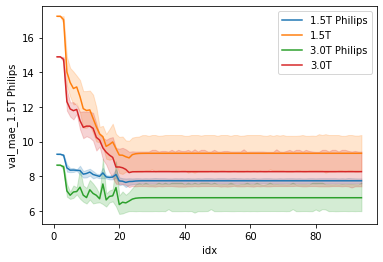

In [71]:
with open('../training_configs/brainage_casa_20.yml') as f:
    params = yaml.load(f, Loader=yaml.FullLoader)

df = pd.DataFrame()

for seeds in [1, 2, 3, 4, 5]:
    
    params['trainparams']['seed'] = seeds
    params['trainparams']['run_postfix'] = seeds

    exp_name = admutils.get_expname(params['trainparams'])
    settings = argparse.Namespace(**params['settings'])

    max_version = max([int(x.split('_')[1]) for x in os.listdir(settings.LOGGING_DIR + exp_name)])
    df_temp = pd.read_csv(settings.LOGGING_DIR  + exp_name + '/version_{}/metrics.csv'.format(max_version))

    df_temp = df_temp.loc[df_temp['val_mae_1.5T'] == df_temp['val_mae_1.5T']]
    df_temp['idx'] = range(1, len(df_temp) + 1)
    
    df = df.append(df_temp)
fig, ax = plt.subplots(1)

for scanner in ['1.5T Philips', '1.5T', '3.0T Philips', '3.0T']:
    sns.lineplot(data=df, y=f'val_mae_{scanner}', err_style='band', x='idx', ax=ax, label=scanner)  

In [15]:
df_res = pd.read_csv('/project/catinous/active_catinous/MELBA/output/results/cache/brainage_cont_brainds_split_val_test_melba_basemodel_batch_memory_tf08_5_44fe8d3f26_val_AEs.csv')

In [16]:
df_res.groupby(['shift', 'scanner']).mean()

ae
shift        scanner                
1.5T         1.5T          21.645419
             1.5T Philips   7.936323
             3.0T          13.490429
             3.0T Philips  12.489828
3.0T         1.5T          11.714897
             1.5T Philips   9.576827
             3.0T          15.412143
             3.0T Philips  13.960235
3.0T Philips 1.5T          10.925409
             1.5T Philips   8.503391
             3.0T          18.610874
             3.0T Philips  12.589842
None         1.5T          10.925409
             1.5T Philips   8.503391
             3.0T          18.610874
             3.0T Philips  12.589842

In [6]:
with open('../training_configs/brainage_casa.yml') as f:
    params = yaml.load(f, Loader=yaml.FullLoader)
    
memdir = params['settings']['TRAINED_MEMORY_DIR']

print(params['trainparams']['startbudget'])


for i in range(5):
    params['trainparams']['seed'] = i+1
    params['trainparams']['run_postfix'] = i+1

    expname = rutils.get_expname(params['trainparams'])

    df = pd.read_csv(f'{memdir}/{expname}.csv')
    print(df.groupby(['scanner']).count())
    
    print(df.groupby(['pseudodomain']).count())

    with open(f'{memdir}/{expname}.txt') as f:
        print(f.readlines())

378
              filepath  pseudodomain  target
scanner                                     
1.5T                38            38      38
1.5T Philips        23            23      23
3.0T                49            49      49
3.0T Philips        18            18      18
              filepath  scanner  target
pseudodomain                           
0                   23       23      23
1                   29       29      29
2                   16       16      16
3                   23       23      23
4                   29       29      29
5                    8        8       8
['train counter: 345\n', 'label counter: 143']
              filepath  pseudodomain  target
scanner                                     
1.5T                31            31      31
1.5T Philips        38            38      38
3.0T                27            27      27
3.0T Philips        32            32      32
              filepath  scanner  target
pseudodomain                           
0        

In [2]:
df_ds = pd.read_csv('/project/catinous/brainds_split_val_test_melba.csv')

In [8]:
df_ds.groupby(['split']).count()

,ID,scanner,Age,Image
split,,,,
base,201,201,201,201
test,259,259,259,259
train,1892,1892,1892,1892
val,259,259,259,259


In [12]:
1892/5, 1892/8, 1892/10, 1892/20

(378.4, 236.5, 189.2, 94.6)

,ID,Age,Image,split
scanner,,,,
1.5T,236,236,236,236
1.5T Philips,315,315,315,315
3.0T,1878,1878,1878,1878
3.0T Philips,182,182,182,182


In [11]:
df_ds['img_short'] = [r.Image[:29] for i, r in df_ds.iterrows()]

In [13]:
df_ds.groupby(['scanner', 'img_short']).count()

,,ID,Age,Image,split
scanner,img_short,,,,
1.5T,/data/dataset/external/OASIS/,236,236,236,236
1.5T Philips,/data/dataset/external/IXI/IX,315,315,315,315
3.0T,/data/dataset/external/OASIS/,1878,1878,1878,1878
3.0T Philips,/data/dataset/external/IXI/IX,182,182,182,182
